# Cointegration Example in time series

Example 3.1 from the book "Likelihood-Based-Inference-Cointegrated-Autoregressive-Econometrics"

Check this link to update

https://github.com/mapsa/seminario-doc-2014/blob/master/cointegration-example.ipynb


In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
import datetime
# %pylab inline
plt.rcParams['figure.figsize'] = (18.0, 8.0)

In [115]:
mu, sigma = 0, 1 # mean and standard deviation
n = 10000
s1 = np.random.normal(mu, sigma, n)
s2 = np.random.normal(mu, sigma, n)
s3 = np.random.normal(mu, sigma, n)
s4 = np.random.normal(mu, sigma, n)

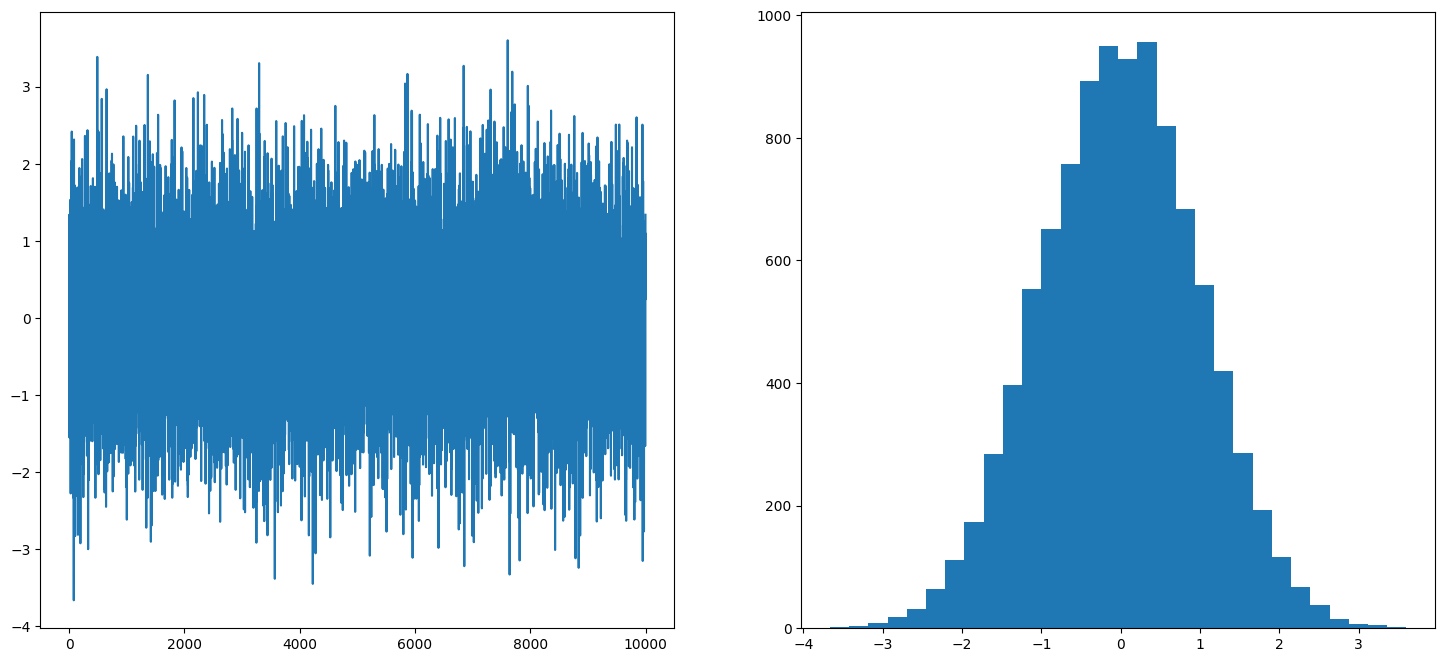

In [116]:
s = s1
plt.figure(1)
plt.subplot(121)
plt.plot(s)
plt.subplot(122)
# plt.hist(s, 30, normed=True)
plt.hist(s, 30)
plt.show()

<AxesSubplot: >

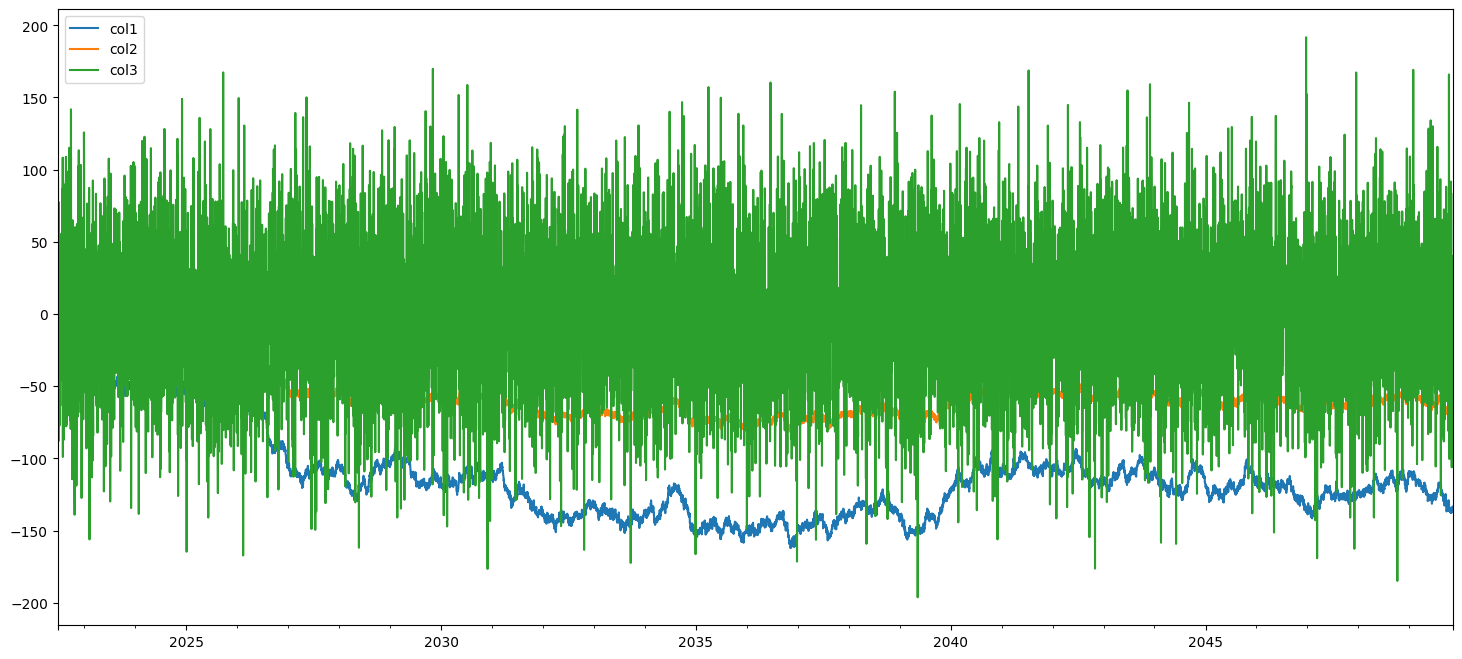

In [117]:
a = 0.5
x_1t = np.cumsum(s1)+s2
x_2t = a*np.cumsum(s1)+s3
x_3t = s4
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(100), periods=n, freq='D')
y = pd.DataFrame(index=index, data={'col1': x_1t, 'col2': x_2t, 'col3':x_3t} )
y.plot()

## Augmented Dickey Fuller test

In [118]:
def ADF(v, crit='5%', max_d=6, reg='nc', autolag='AIC'):
    """ Augmented Dickey Fuller test

    Parameters
    ----------
    v: ndarray matrix
        residuals matrix

    Returns
    -------
    bool: boolean
        true if v pass the test 
    """

    boolean = False

    
    adf = adfuller(v, max_d, reg, autolag)
    print (adf)
    if(adf[0] < adf[4][crit]):
        pass
    else:
        boolean = True

    return boolean

# Testing Unit root

In [119]:
print (ADF(x_1t))   # unit root hypothesis can't be rejected
print (ADF(np.diff(x_1t)))
print (ADF(x_2t) )  # unit root hypothesis can't be rejected
print (ADF(np.diff(x_2t)))
print (ADF(x_3t))   # unit root hypothesis is rejected at the 95 per cent level  -> I(0)

(0.33848823907934816, 0.7851317841245551, 5, 9994, {'1%': -2.5659637505421, '5%': -1.9410269097848125, '10%': -1.6167934512016202}, 37685.58772062604)
True
(-51.26474248973372, 0.0, 4, 9994, {'1%': -2.5659637505421, '5%': -1.9410269097848125, '10%': -1.6167934512016202}, 37679.68287755415)
False
(0.29376411983650835, 0.7731724027302087, 6, 9993, {'1%': -2.5659637729364624, '5%': -1.9410269124810415, '10%': -1.616793448547595}, 33355.26727603156)
True
(-49.0349995862703, 0.0, 6, 9992, {'1%': -2.5659637953353074, '5%': -1.9410269151778108, '10%': -1.616793445893039}, 33346.63534052417)
False
(-68.8784211693888, 0.0, 1, 9998, {'1%': -2.5659636610094574, '5%': -1.941026899005297, '10%': -1.6167934618124173}, 106717.3818383028)
False


C:\Users\BenHH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\BenHH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\BenHH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\BenHH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

## Johansen function

In [120]:
def get_johansen(y, p):
        """
        Get the cointegration vectors at 95% level of significance
        given by the trace statistic test.
        """

        N, l = y.shape
        jres = coint_johansen(y, 0, p)
        trstat = jres.lr1                       # trace statistic
        tsignf = jres.cvt                       # critical values

        for i in range(l):
            if trstat[i] > tsignf[i, 1]:     # 0: 90%  1:95% 2: 99%
                r = i + 1
        jres.r = r
        jres.evecr = jres.evec[:, :r]

        return jres

In [121]:
print(y)

                  col1       col2       col3
2022-06-24   -1.750578  -1.283724   9.789108
2022-06-25   -0.535561   0.747339 -69.014037
2022-06-26    0.754712  -0.139154  95.481759
2022-06-27    1.472850   0.303446  -3.849406
2022-06-28   -0.222009   0.840842   4.377649
...                ...        ...        ...
2049-11-04 -137.351546 -69.281879  10.260104
2049-11-05 -136.528885 -68.648601 -13.215170
2049-11-06 -133.805129 -68.204599 -82.335162
2049-11-07 -134.374486 -67.284617  40.292945
2049-11-08 -133.480428 -65.096509   9.739627

[10000 rows x 3 columns]


In [122]:
p=2
jres=get_johansen(y,p)
print ("There are ", jres.r, "cointegration vectors")
v1=jres.evecr[:,0]
v2=jres.evecr[:,1]
print (v1)
print (v2)
v3=jres.evec[:,2]  # v3 is not a cointegration vector

There are  3 cointegration vectors
[ 0.74822937 -1.49611747  0.00992316]
[-0.22105563  0.44263414  0.03247923]


Even though we were expecting [0.5 -1 0] y [0 0 1] these vectors are in the same vector space. If we divide every vector by their second component we will get some similar results.

In [123]:
v1/-v1[0]

array([-1.        ,  1.9995439 , -0.01326219])

In [124]:
v2/-v2[1]

array([ 0.49940936, -1.        , -0.07337714])

In [125]:
v3/-v3[1]

array([-2.31157661e+00, -1.00000000e+00, -1.76345378e-03])

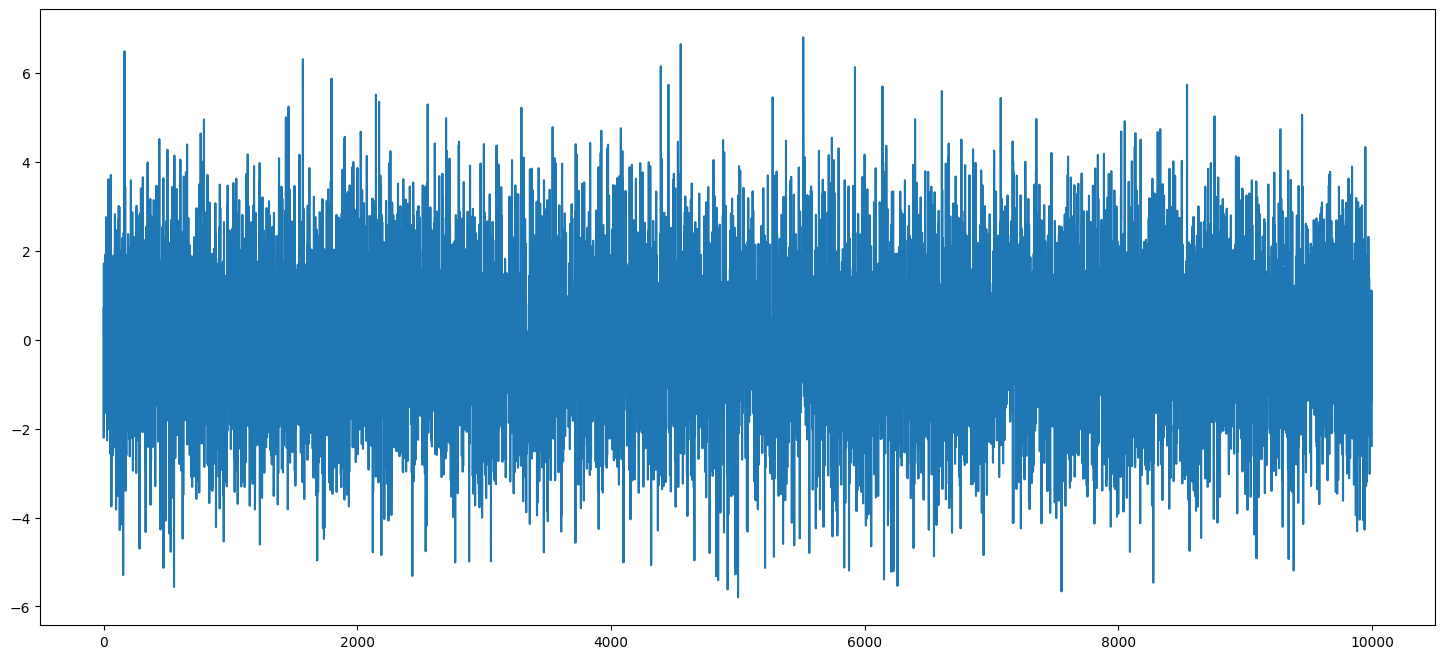

In [126]:
# If we apply vector v1 we get a I(0) time series
plt.plot(np.dot(y.values,v1))

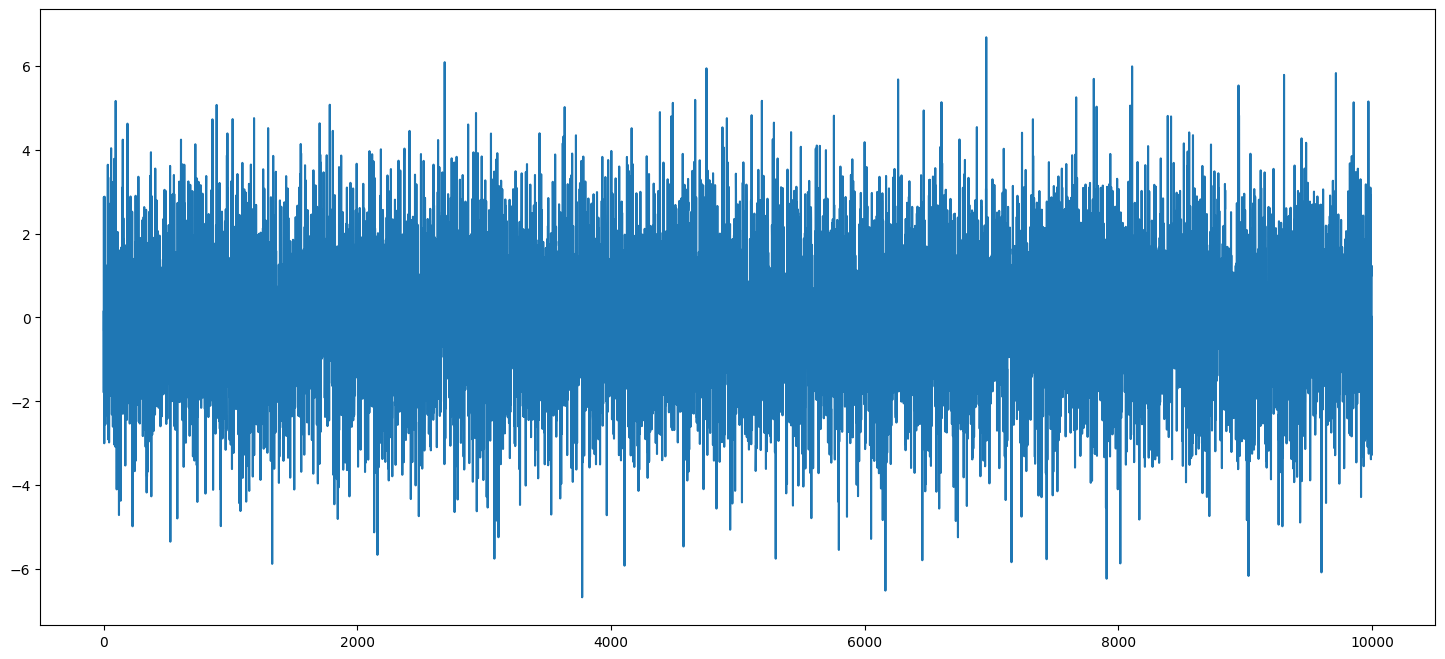

In [127]:
# If we apply vector v2 we get a I(0) time series
plt.plot(np.dot(y.values,v2))

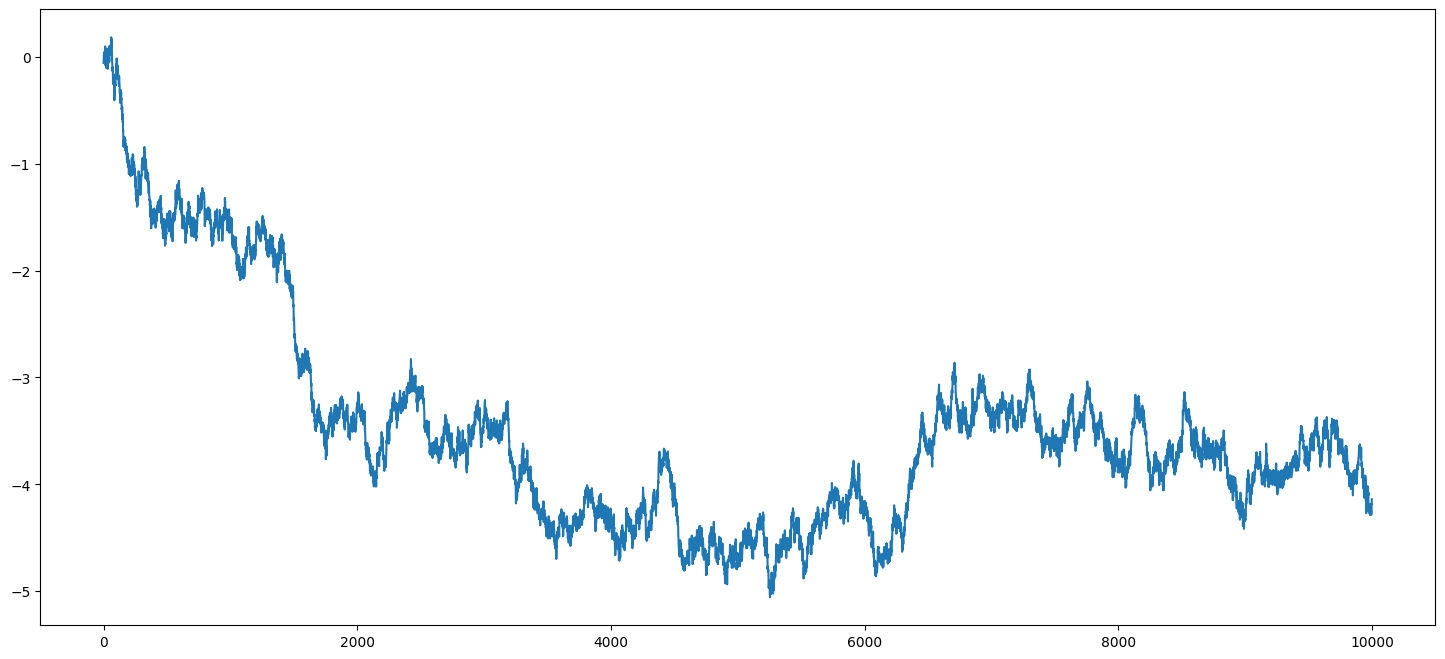

In [128]:
# If we apply vector v3 we won't get a I(0) time series since it's not a cointegration vector.
plt.plot(np.dot(y.values,v3))

In [129]:
np.dot(y.values,v3)



array([-0.05887251, -0.00678533,  0.01965496, ..., -4.18464203,
       -4.18663526, -4.14008609])

Some test

In [130]:
w1=[0.5, -1, 0]
w2=[0, 0, 1]
# plt.plot (y.values)
# plt.plot (np.dot(y.values,w1))
# plt.plot (a*np.diff (s2) - np.diff (s3))

l0 = np.dot(y.values, v2)/v2[0]
l1 = np.dot(y.values, w1)
l2 = (a*s2 - s3) 
l3 = a*x_1t - x_2t
print (l0)
print (l1)
print (l2)
print (l3)
print (np.diff(w1))

# plt.plot (l1 - l2)

[ -0.61838624   8.10807583 -12.99557957 ...  14.86272493  -5.56625514
  -4.56445469]
[ 0.40843492 -1.01512014  0.51651032 ...  1.30203412  0.09737399
 -1.64370459]
[ 0.40843492 -1.01512014  0.51651032 ...  1.30203412  0.09737399
 -1.64370459]
[ 0.40843492 -1.01512014  0.51651032 ...  1.30203412  0.09737399
 -1.64370459]
[-1.5  1. ]


In [131]:
from johansen import Johansen

j = Johansen(y, model=4, significance_level=0)
eigenvectors, r = j.johansen()

print ("r values are: {}".format(r))

vec = eigenvectors[:, 0]
vec_min = np.min(np.abs(vec))
vec = vec / vec_min

print ("The first cointegrating relation: {}".format(vec))
print ("The first cointegrating relation: {}".format(eigenvectors[:, 1]/ vec_min))
print ("The first cointegrating relation: {}".format(eigenvectors[:, 2]/ vec_min))

r values are: [0, 1, 2]
The first cointegrating relation: [-5.81903688e+02  1.16322357e+03 -1.00000000e+00]
The first cointegrating relation: [-17.7254651   35.99866158  25.60822177]
The first cointegrating relation: [-27.60404586 -12.60655076  -0.02962211]


In [132]:
import matplotlib.pyplot as plt
import pickle
from johansen import Johansen
import numpy as np

# Fitting dates.
start_date = '2016/02/01'
end_date = '2016/05/30'

prices_df = pickle.load(open('ewa_ewc_df.p', 'rb'))
prices_df = prices_df.sort_values(by='date').set_index('date')

x = prices_df.loc[start_date:end_date].as_matrix()
x_centered = x - np.mean(x, axis=0)

johansen = Johansen(x_centered, model=2, significance_level=0)
eigenvectors, r = johansen.johansen()

print ("r values are: {}".format(r))

vec = eigenvectors[:, 0]
vec_min = np.min(np.abs(vec))
vec = vec / vec_min

print ("The first cointegrating relation: {}".format(vec))

FileNotFoundError: [Errno 2] No such file or directory: 'ewa_ewc_df.p'